In [1]:
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt

import numpy as np

In [2]:
housing = pd.read_csv('./housing.csv')
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Cleaning the data
Removing null type data:

In [3]:
# None of the values should be null but some are:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
# Removing nulls in a column and verifying the result:
housing = housing[~housing["total_bedrooms"].isnull()]
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

### Some data is not numerical or boolean.
Converting string formatted data:

In [5]:
housing = pd.get_dummies(housing, ['ocean_proximity'])
# get_dummies creates columns from unique values in a specified column to have
# boolean values instead of strings for future data manipulation use
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False


## Plotting graphs to visualise the data.
### Histograms:

Text(0.5, 1.0, 'The distribution of housing prices')

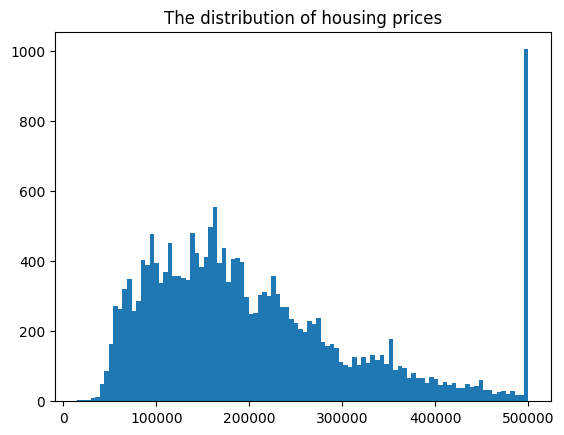

In [6]:
# Plotting median house values on a histogram
plt.hist(housing['median_house_value'], bins=100)
# bins is how many intervals should the data be split into
plt.title("The distribution of housing prices")

Only numerical data gets plotted in histograms. This means we don't need to worry about our boolean data.

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

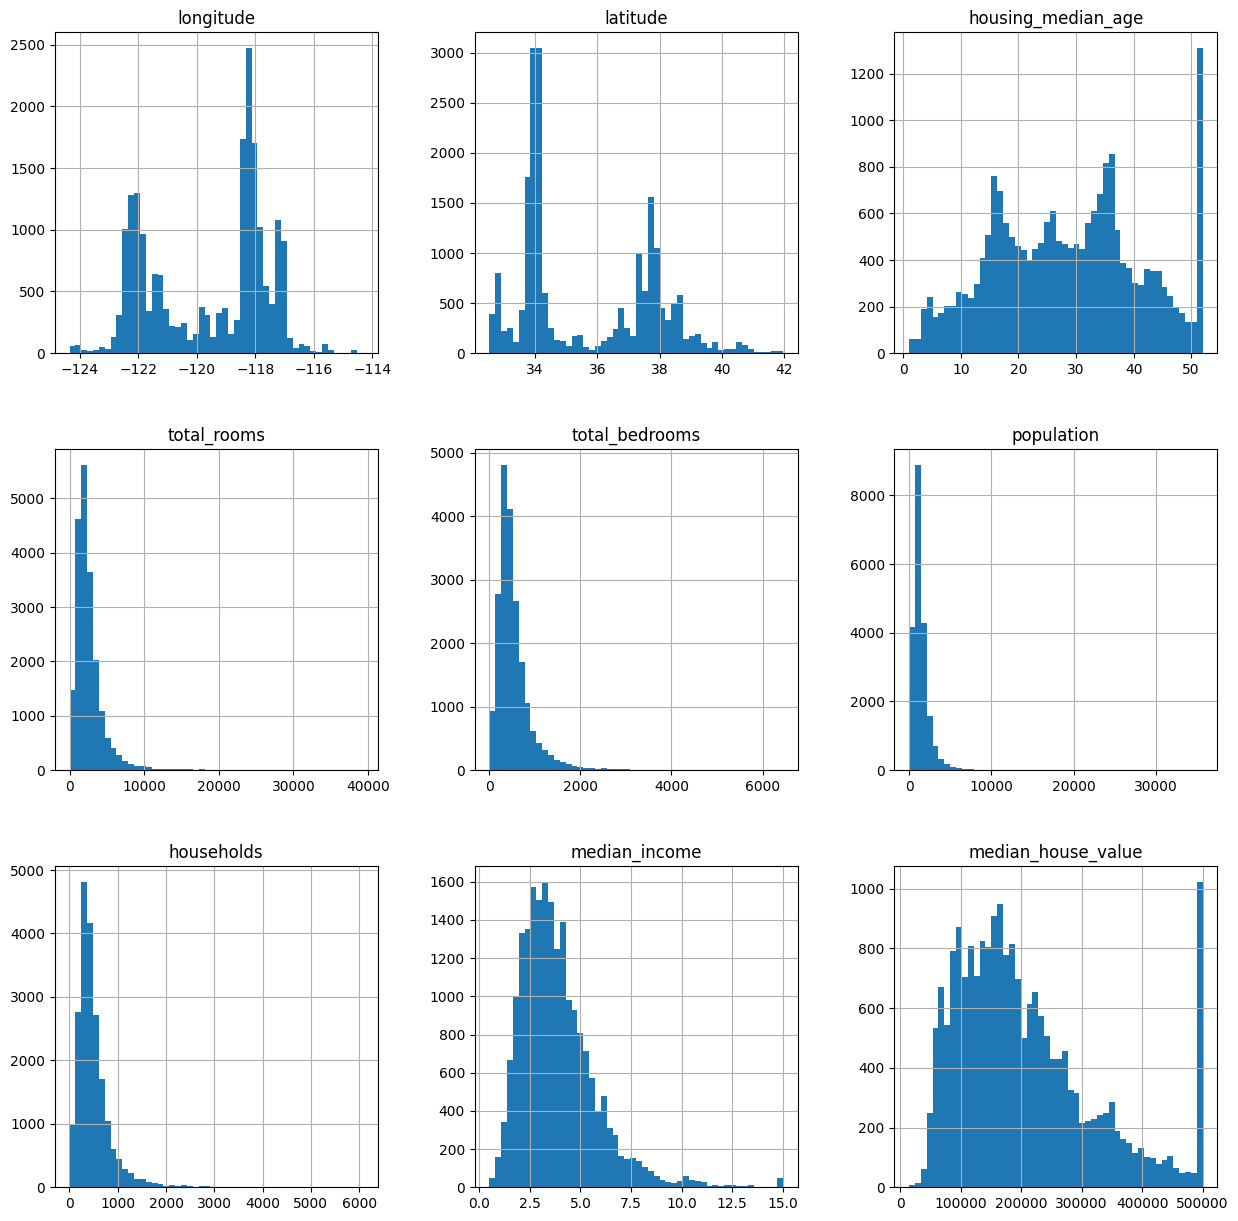

In [7]:
# Histogram of all columns in the data-frame
housing.hist(bins=50, figsize=(15,15))
# figsize is the sizing of the graphs x by y in proportions

### Heat map:
Heat map will automatically include all of the columns even where the data is not numerical.
This means we need to filter that data out if we don't need it.

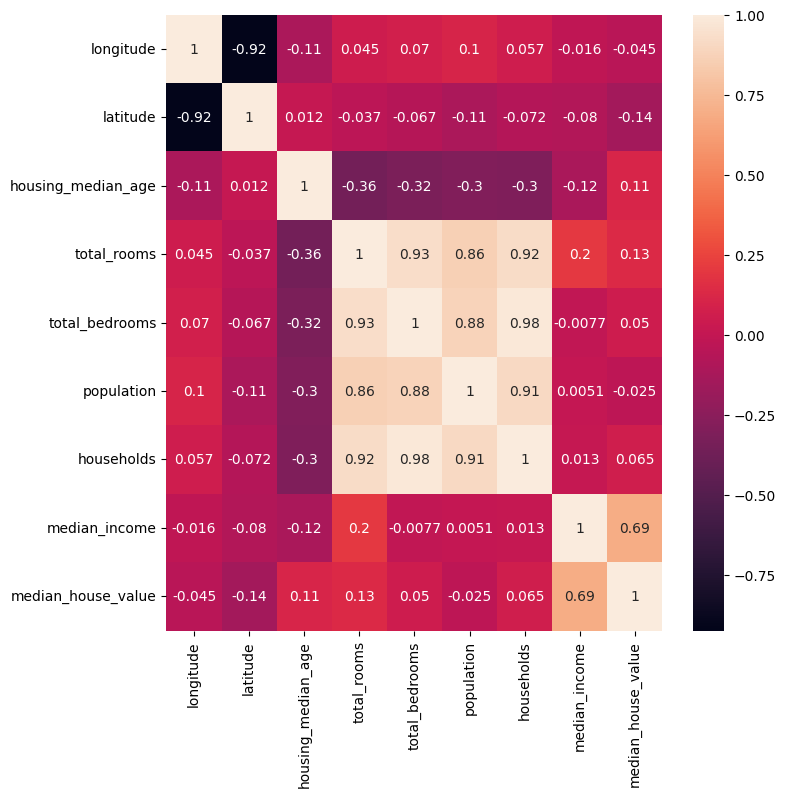

In [8]:
housing_numerical = housing.select_dtypes(exclude='bool')
# select_dtypes allows to only select columns where datatype is x 
# or exclude those where it is y

plt.figure(figsize = (8,8))
# Seaborn library is built on top of the matplotlib. This means, we can use its extra
# methods with our graphs made in seaborn
sns.heatmap(housing_numerical.corr(), annot=True)
# corr() finds the correlations between the columns
# annot is automatically set to False in heatmap
plt.show()

Heatmap shows a lot of high correlations within the data. To deal with it, we'll
create a combination of the correlated features and drop the original columns.

In [9]:
# Ratio of the total rooms to households:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']

# Ratio of the total bedrooms to the total rooms:
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']

# Ratio of the population to the households:
housing['population_per_household']= housing['population']/housing['households']

# Latitude and longitude combined:
housing['coordinates'] = housing['longitude']/housing['latitude']

# Verifying new data
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_<1H OCEAN   20433 non-null  bool   
 10  ocean_proximity_INLAND      20433 non-null  bool   
 11  ocean_proximity_ISLAND      20433 non-null  bool   
 12  ocean_proximity_NEAR BAY    20433 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  20433 no

In [10]:
# Dropping high correlated columns which were put in new columns as ratios:
housing = housing.drop(["total_bedrooms","latitude","longitude","households"], axis=1)
housing = housing.drop(["total_rooms","population"], axis=1)
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   housing_median_age          20433 non-null  float64
 1   median_income               20433 non-null  float64
 2   median_house_value          20433 non-null  float64
 3   ocean_proximity_<1H OCEAN   20433 non-null  bool   
 4   ocean_proximity_INLAND      20433 non-null  bool   
 5   ocean_proximity_ISLAND      20433 non-null  bool   
 6   ocean_proximity_NEAR BAY    20433 non-null  bool   
 7   ocean_proximity_NEAR OCEAN  20433 non-null  bool   
 8   rooms_per_household         20433 non-null  float64
 9   bedrooms_per_room           20433 non-null  float64
 10  population_per_household    20433 non-null  float64
 11  coordinates                 20433 non-null  float64
dtypes: bool(5), float64(7)
memory usage: 1.3 MB


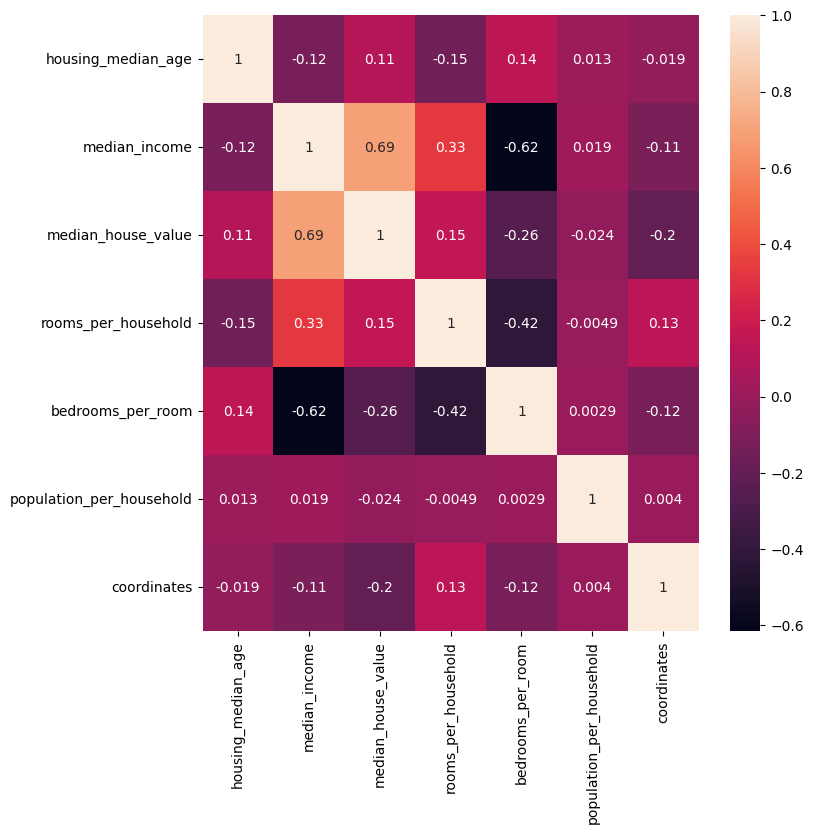

In [11]:
# Updated heat map
housing_numerical = housing.select_dtypes(exclude='bool')
plt.figure(figsize = (8,8))

sns.heatmap(housing_numerical.corr(), annot=True)
plt.show()

In [12]:
housing_numerical.to_csv("cleaned_housing.csv")